### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import pathlib

from joblib import load

import matplotlib.pyplot as plt
import seaborn as sns

### Interpret best model

In [2]:
model_dir = pathlib.Path("../2.train_model/models/")

log_reg_model_path = pathlib.Path(f"{model_dir}/log_reg_model.joblib")
log_reg_model = load(log_reg_model_path)

### Compile Coefficients Matrix

In [3]:
coefs = np.abs(log_reg_model.coef_)
coefs = pd.DataFrame(coefs).T
coefs.columns = log_reg_model.classes_

print(coefs.shape)
coefs.head()

(1280, 17)


,ADCCM,Anaphase,Apoptosis,Artefact,Binuclear,Elongated,Folded,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,OutOfFocus,Polylobed,Prometaphase,SmallIrregular
0,0.038876,0.033116,0.022631,0.047884,0.035262,0.007226,0.014869,0.004547,0.004998,0.241284,0.062175,0.070803,0.053817,0.011429,0.039450,0.039492,0.211716
1,0.008867,0.009168,0.005477,0.013224,0.087360,0.031228,0.069773,0.008628,0.024011,0.080251,0.037109,0.033594,0.009237,0.003902,0.016093,0.017925,0.051966
2,0.100620,0.034223,0.038978,0.078417,0.036151,0.044694,0.001179,0.027882,0.002287,0.082114,0.035684,0.004314,0.010682,0.007525,0.032471,0.087790,0.060241
3,0.024479,0.011327,0.042419,0.045631,0.152084,0.068684,0.002359,0.005475,0.077419,0.118210,0.017528,0.019274,0.005551,0.018284,0.015692,0.015418,0.068509
4,0.007494,0.038939,0.022420,0.002303,0.049049,0.017120,0.012702,0.015474,0.034420,0.045355,0.013687,0.048556,0.014415,0.017419,0.004856,0.005279,0.061223


### Diagrams for interpreting coefficients

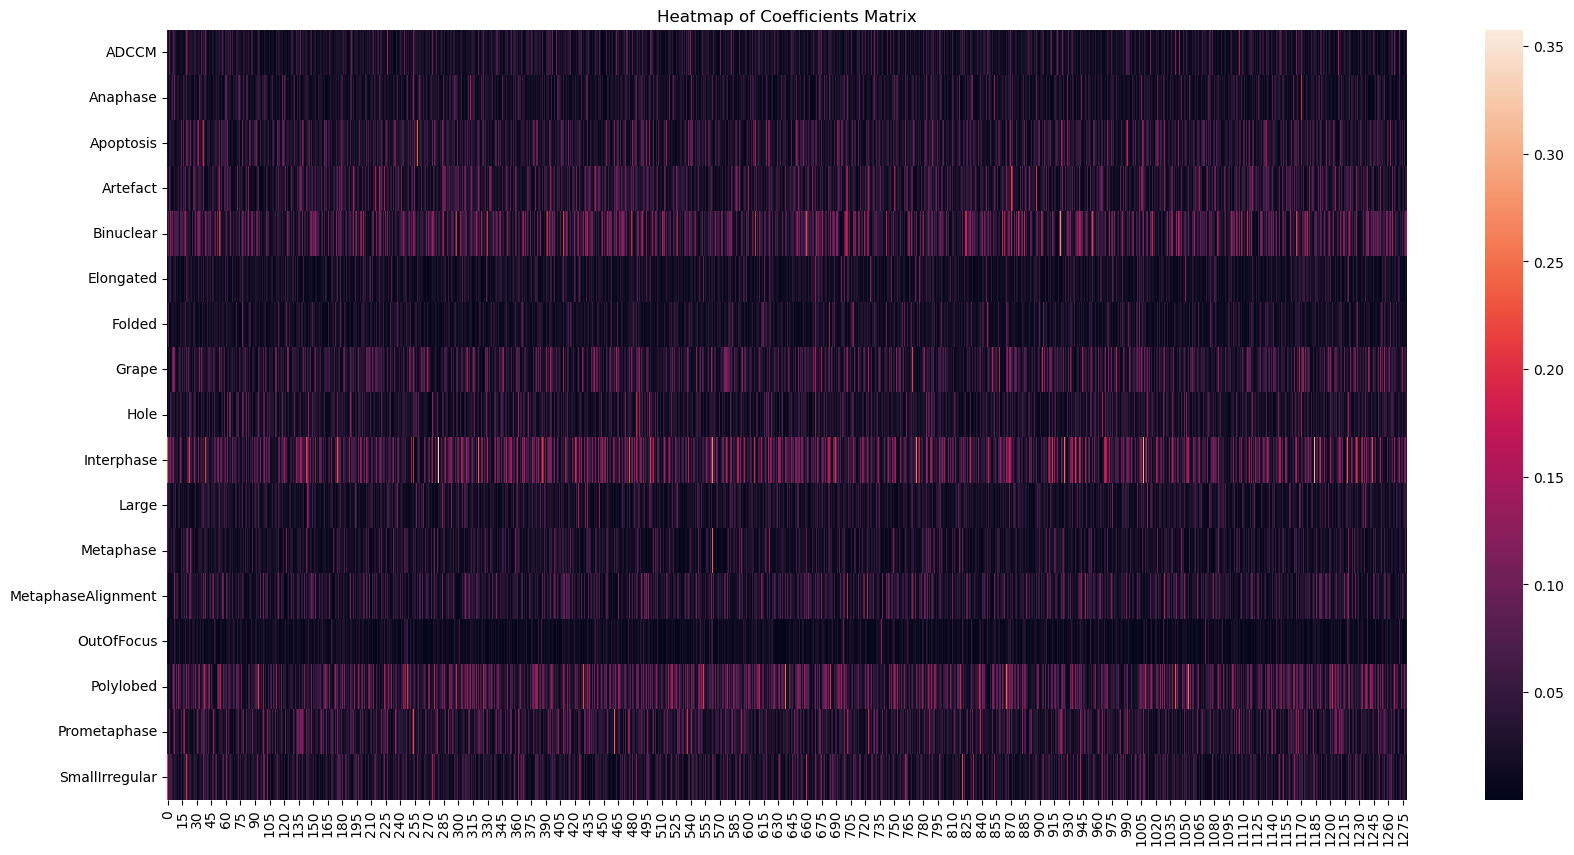

In [4]:
# display heatmap of average coefs
plt.figure(figsize=(20, 10))
plt.title("Heatmap of Coefficients Matrix")
ax = sns.heatmap(data=coefs.T)

/home/roshankern/anaconda3/envs/phenotypic_profiling/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


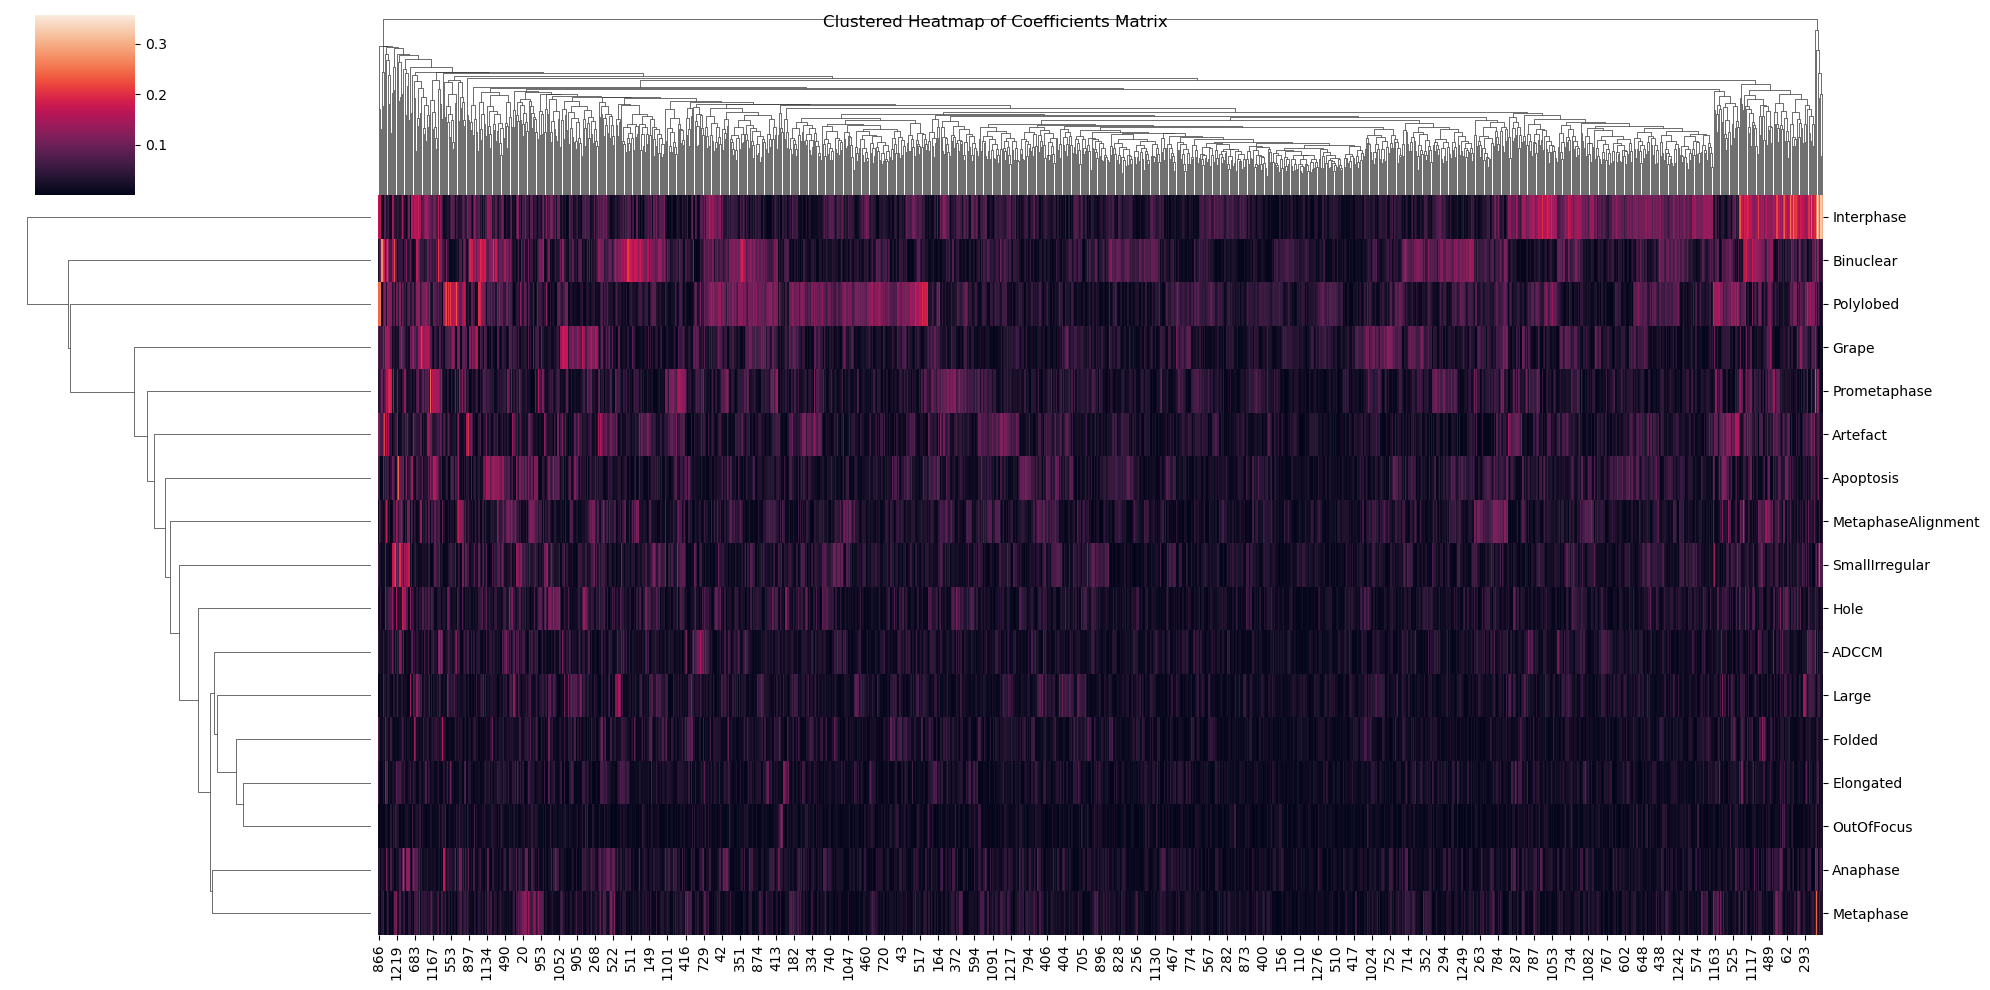

In [5]:
# display clustered heatmap of coefficients
ax = sns.clustermap(data=coefs.T, figsize=(20, 10), row_cluster=True, col_cluster=True)
ax = ax.fig.suptitle("Clustered Heatmap of Coefficients Matrix")

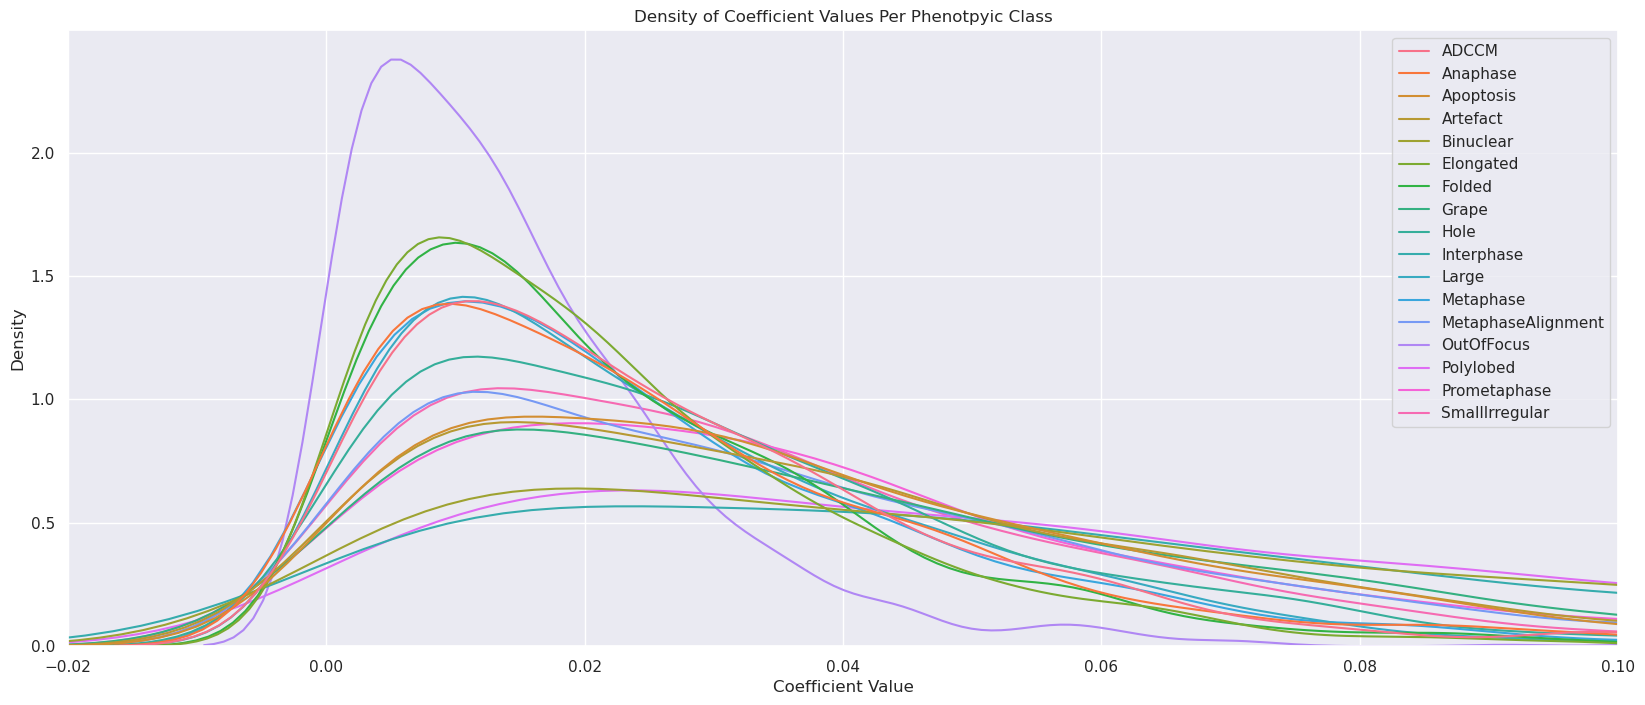

In [6]:
# display density plot for coefficient values of each class
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlim(-0.02, 0.1)
plt.xlabel("Coefficient Value")
plt.ylabel("Density")
plt.title("Density of Coefficient Values Per Phenotpyic Class")
ax = sns.kdeplot(data=coefs)

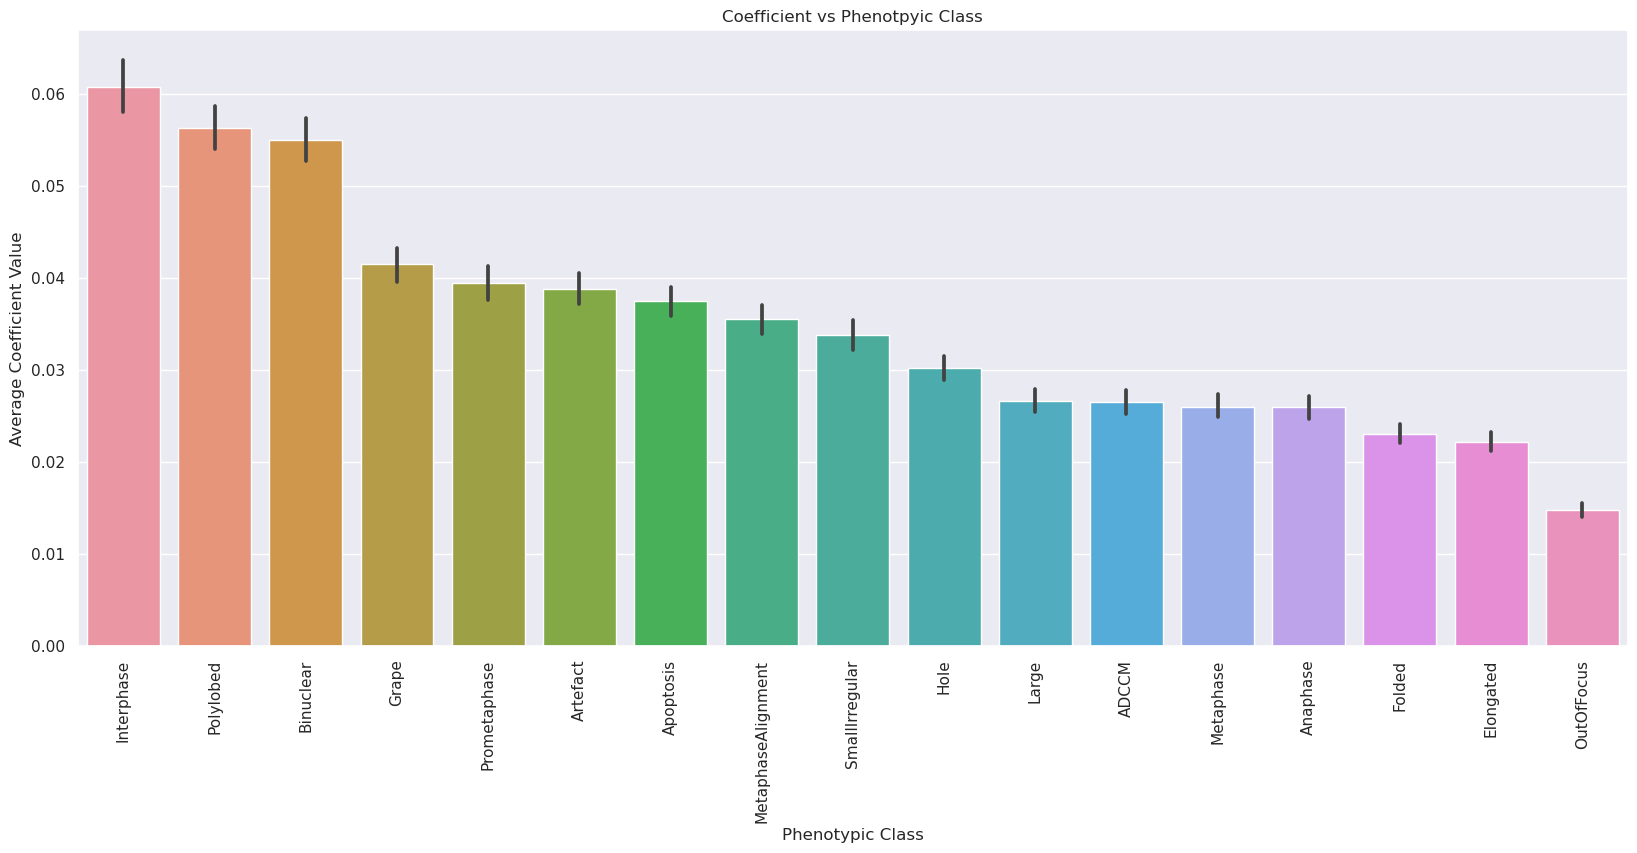

In [7]:
# display average coefficient value vs phenotypic class bar chart
pheno_class_ordered = coefs.reindex(
    coefs.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=pheno_class_ordered)

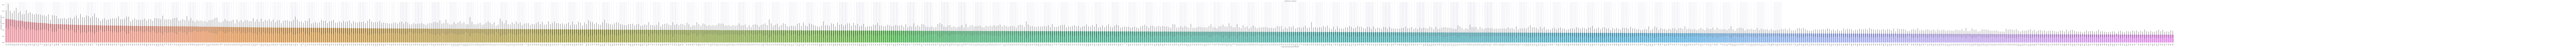

In [8]:
# display average coefficient value vs feature bar chart
feature_ordered = coefs.T.reindex(
    coefs.T.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (500, 8)})
plt.xlabel("Deep Learning Feature Number")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Feature")
plt.xticks(rotation=90)
ax = sns.barplot(data=feature_ordered)

### Interpret shuffled baseline model

In [9]:
shuffled_baseline_log_reg_model_path = pathlib.Path(f"{model_dir}/shuffled_baseline_log_reg_model.joblib")
shuffled_baseline_log_reg_model = load(shuffled_baseline_log_reg_model_path)

### Compile Coefficients Matrix

In [10]:
coefs = np.abs(shuffled_baseline_log_reg_model.coef_)
coefs = pd.DataFrame(coefs).T
coefs.columns = shuffled_baseline_log_reg_model.classes_

print(coefs.shape)
coefs.head()

(1280, 17)


,ADCCM,Anaphase,Apoptosis,Artefact,Binuclear,Elongated,Folded,Grape,Hole,Interphase,Large,Metaphase,MetaphaseAlignment,OutOfFocus,Polylobed,Prometaphase,SmallIrregular
0,0.000000,0.000000,0.015384,0.000000,0.000000,0.000000,0.000000,0.000000,0.008019,0.049253,0.035892,0.0,0.000000,0.009499,0.008034,0.040896,0.005463
1,0.024145,0.000000,0.002949,0.000000,0.000000,0.029092,0.000000,0.000000,0.021849,0.000000,0.000000,0.0,0.000000,0.000000,0.046013,0.011760,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026931,0.017503,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.022945,0.037547,0.000000
3,0.000000,0.002284,0.033346,0.000000,0.000000,0.000000,0.000000,0.025466,0.000000,0.030106,0.017670,0.0,0.001424,0.000000,0.011455,0.000000,0.000000
4,0.000000,0.000000,0.025675,0.041148,0.052203,0.000000,0.000000,0.012259,0.000000,0.018107,0.012479,0.0,0.073607,0.051460,0.000000,0.000000,0.000000


### Diagrams for interpreting coefficients

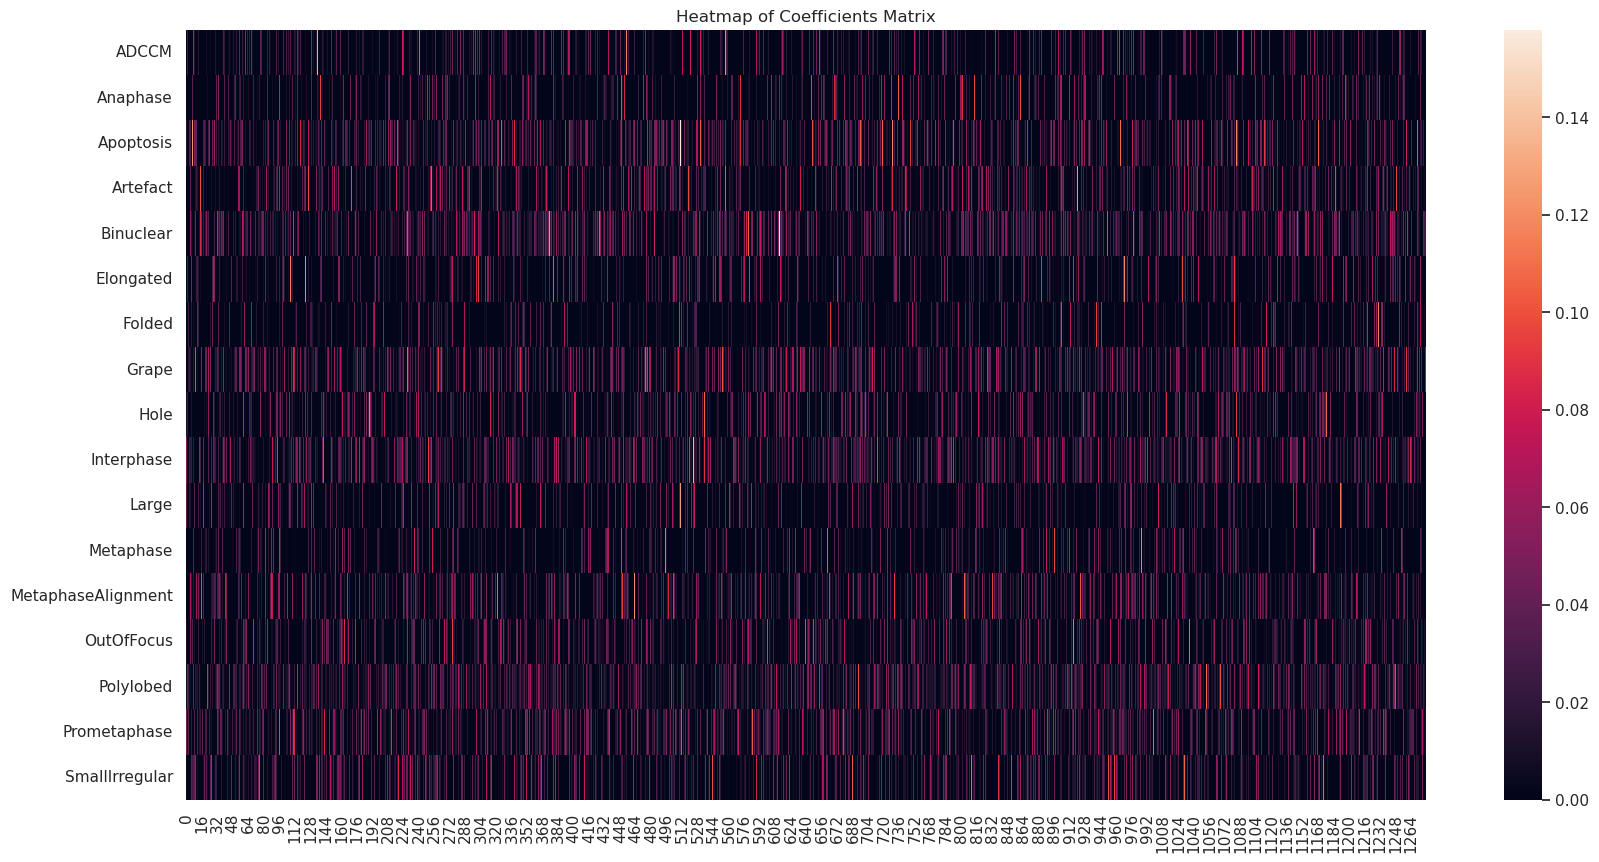

In [11]:
# display heatmap of average coefs
plt.figure(figsize=(20, 10))
plt.title("Heatmap of Coefficients Matrix")
ax = sns.heatmap(data=coefs.T)

/home/roshankern/anaconda3/envs/phenotypic_profiling/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


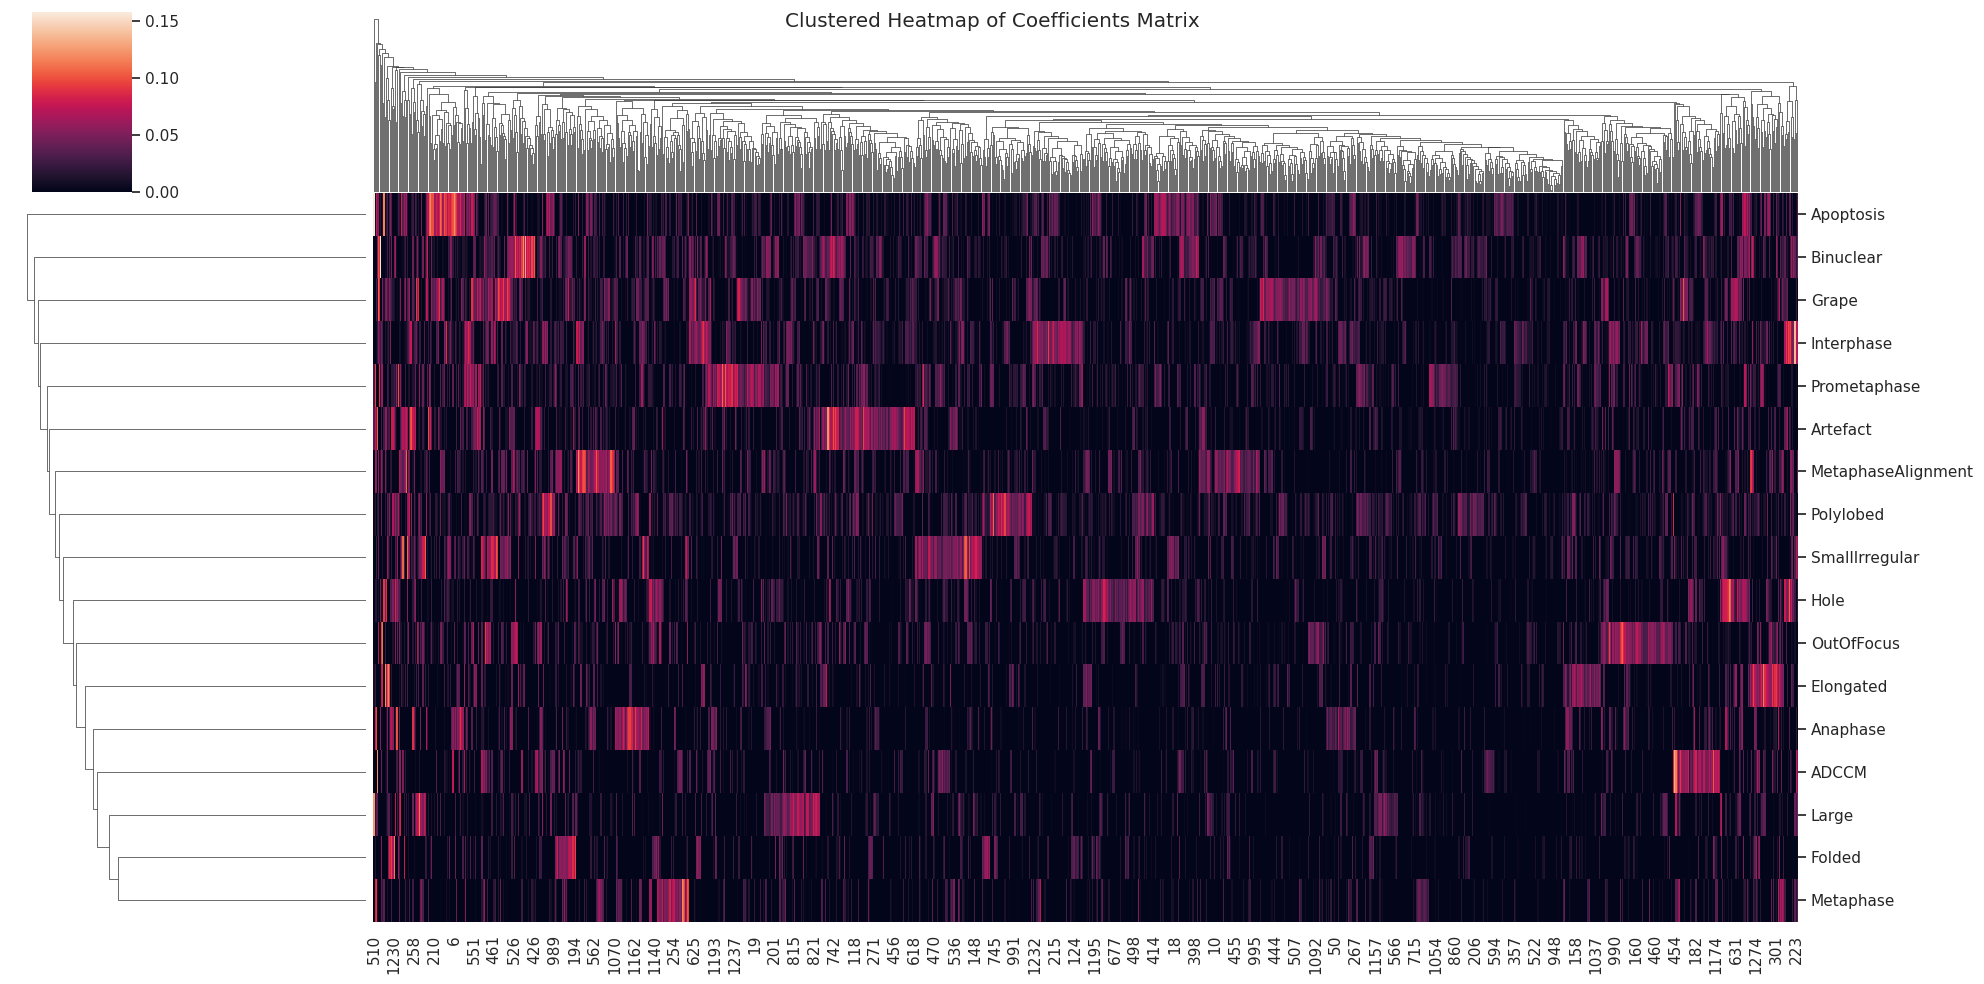

In [12]:
# display clustered heatmap of coefficients
ax = sns.clustermap(data=coefs.T, figsize=(20, 10), row_cluster=True, col_cluster=True)
ax = ax.fig.suptitle("Clustered Heatmap of Coefficients Matrix")

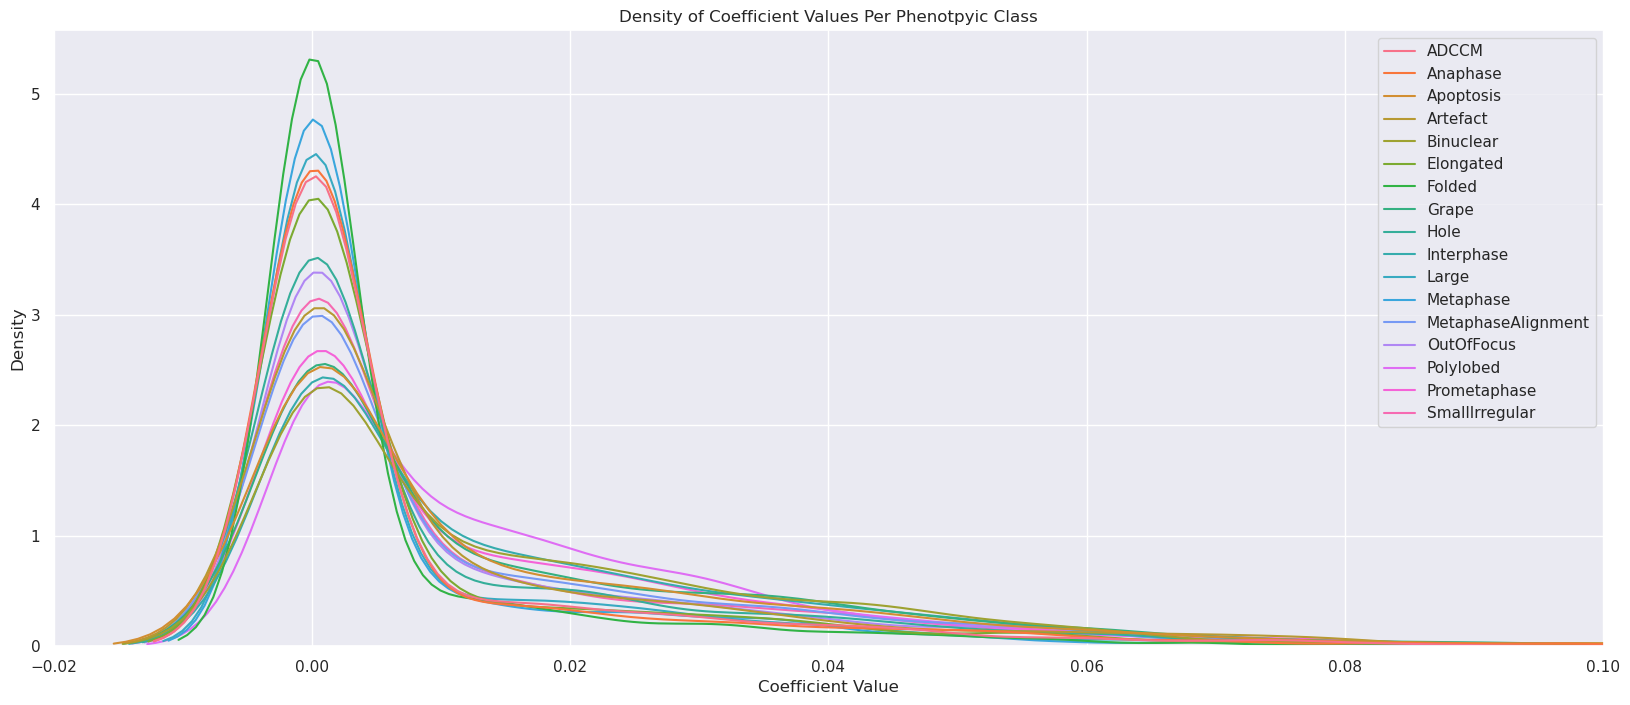

In [13]:
# display density plot for coefficient values of each class
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlim(-0.02, 0.1)
plt.xlabel("Coefficient Value")
plt.ylabel("Density")
plt.title("Density of Coefficient Values Per Phenotpyic Class")
ax = sns.kdeplot(data=coefs)

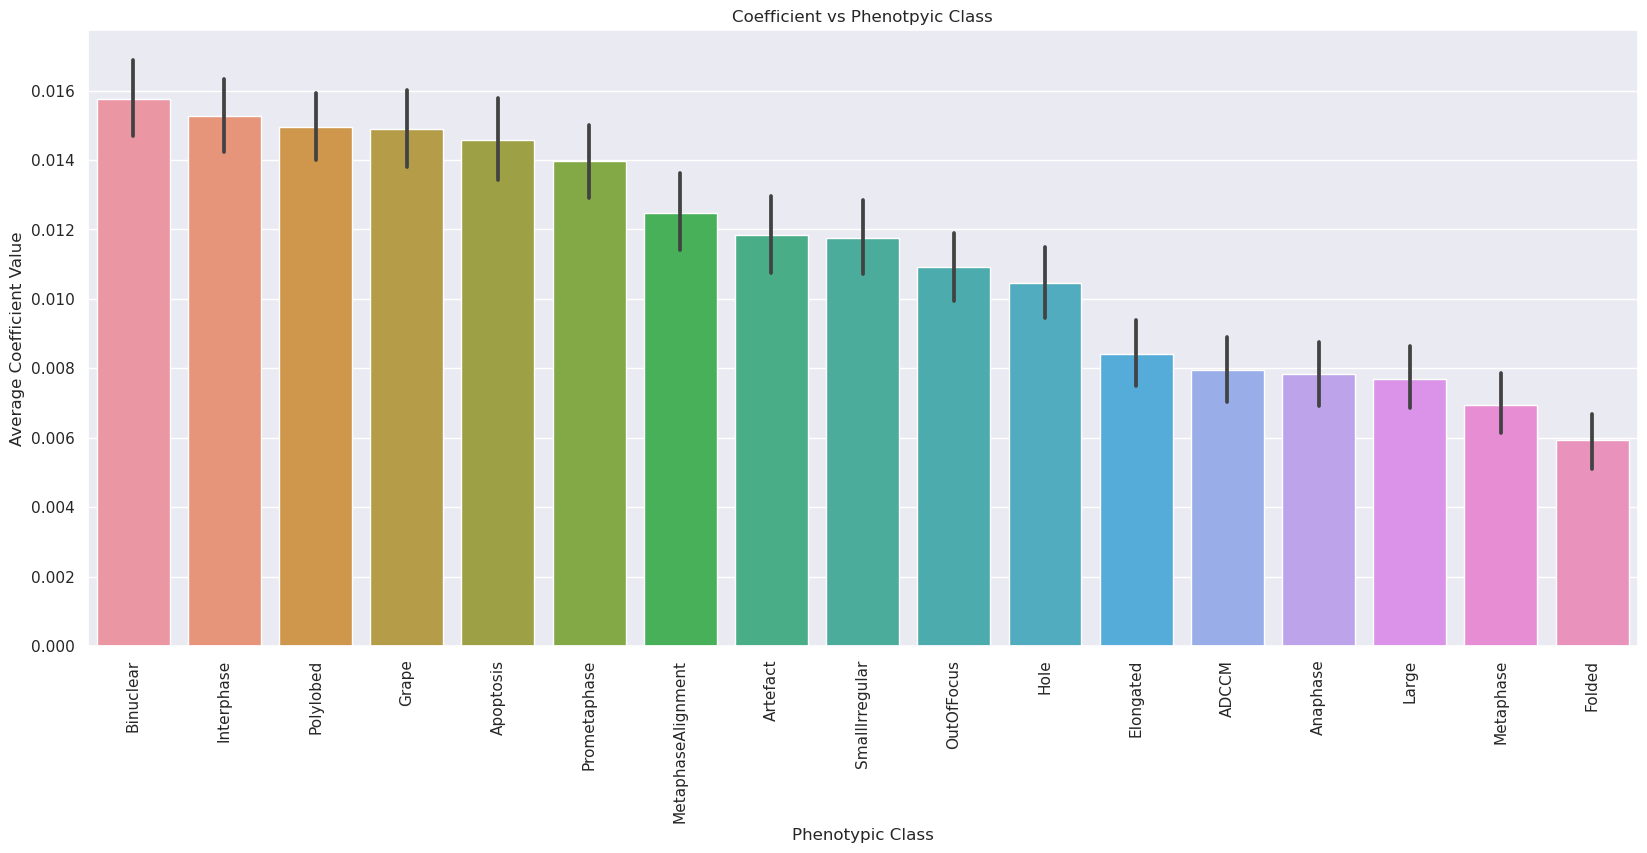

In [14]:
# display average coefficient value vs phenotypic class bar chart
pheno_class_ordered = coefs.reindex(
    coefs.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (20, 8)})
plt.xlabel("Phenotypic Class")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Phenotpyic Class")
plt.xticks(rotation=90)
ax = sns.barplot(data=pheno_class_ordered)

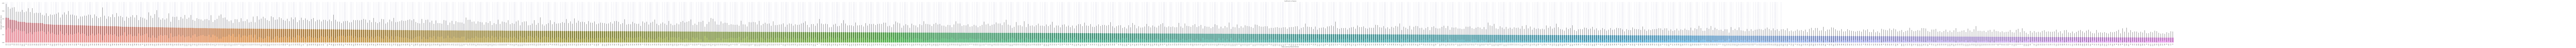

In [15]:
# display average coefficient value vs feature bar chart
feature_ordered = coefs.T.reindex(
    coefs.T.mean().sort_values(ascending=False).index, axis=1
)
sns.set(rc={"figure.figsize": (500, 8)})
plt.xlabel("Deep Learning Feature Number")
plt.ylabel("Average Coefficient Value")
plt.title("Coefficient vs Feature")
plt.xticks(rotation=90)
ax = sns.barplot(data=feature_ordered)